## BME i9400
## Fall 2024
### Primer: Linear Algebra

## Installing Python libraries directly from an iPython notebook
For today's lecture, we will make use of the OpenCV library. We will need to install this library into our existing Conda environment.  

We do not need to work in the terminal (or PowerShell for Windows) to install the library. We can do it directly from the notebook. Just add a cell with the following command:
```python   
!pip install opencv-python
```
The exclamation mark at the beginning of the command tells the notebook that this is a *shell* command, not a Python command.


## Vectors and Matrices
A vector can be written as:
$$
\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}
$$
A matrix can be represented as:
$$
X = \begin{bmatrix} x_{11} & ... & x_{1n} \\ \vdots & \ddots & \vdots \\ x_{m1} & ... & x_{mn} \end{bmatrix}
$$


Let's visualize some vectors and matrices in Python. For this, we will need to import both the numpy and matplotlib libraries. We will use numpy to create the vectors and matrices, and matplotlib to render them in a plot.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

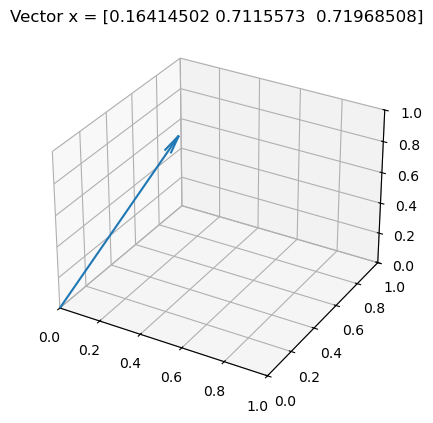

In [5]:
# create a random 3-d vector
x = np.random.rand(3)

# render the vector in a 3-d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, x[0], x[1], x[2], arrow_length_ratio=0.1)
ax.set_title(f'Vector x = {x}')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
plt.show()

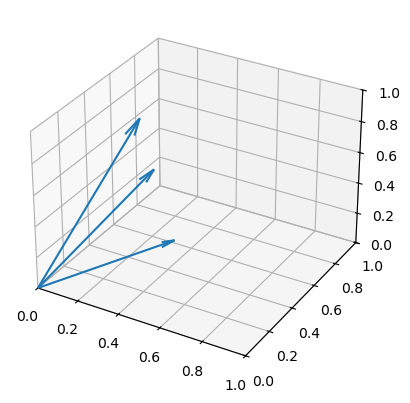

In [6]:
# create a matrix of 3 columns with random values
X = np.random.rand(3, 3)

# render each column of matrix X as a vector in a 3-d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(3):
    ax.quiver(0, 0, 0, X[0, i], X[1, i], X[2, i], arrow_length_ratio=0.1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
plt.show()


## Matrix by Vector Multiplication
Let $A$ be an $M \times N$ matrix, and $\mathbf{b}$ an $N \times 1$ matrix. Then:
$$
\mathbf{x} = A \mathbf{b}
$$
Where:
$$
x_i = \mathbf{a}_i \cdot \mathbf{b} = \sum_{j=1}^{N} A_{ij}b_j
$$
Note: we are multiplying rows of $A$ by $\mathbf{b}$, element-by-element.


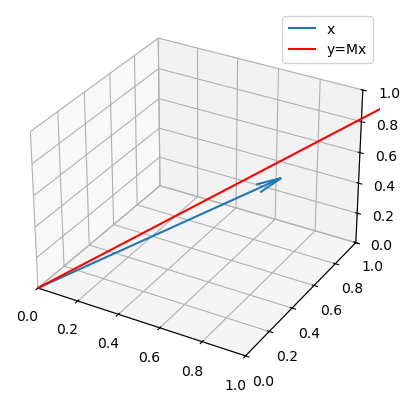

In [9]:
# Demonstrating matrix by vector multiplication
x = np.random.rand(3)
M = np.random.rand(3,3)
y = M @ x  # the @ symbol is the matrix multiplication operator in Python

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, x[0], x[1], x[2], arrow_length_ratio=0.1, label='x')
ax.quiver(0, 0, 0, y[0], y[1], y[2], color='r', arrow_length_ratio=0.1, label='y=Mx')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.legend()
plt.show()


## Matrix by Matrix Multiplication
Let $A$ be an $M \times N$ matrix, and $B$ an $N \times K$ matrix. Then:
$$
X = AB
$$
Where:
$$
X_{ik} = \sum_{j=1}^{N} A_{ij} B_{jk}
$$
Note: we are multiplying rows of $A$ by columns of $B$, element-by-element.


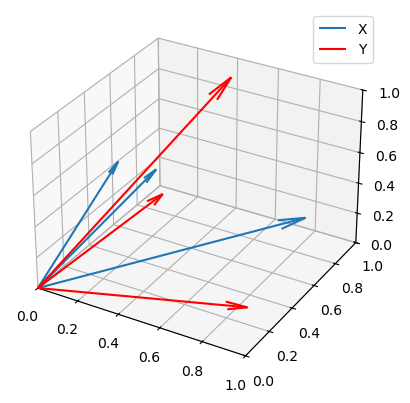

In [13]:
# Demonstrating matrix by matrix multiplication
X = np.random.rand(3, 3)
Y = np.random.rand(3, 3)
Z = X @ Y

# render each column of matrix X as a vector in a 3-d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(3):
    ax.quiver(0, 0, 0, X[0, i], X[1, i], X[2, i], arrow_length_ratio=0.1, label='X')
    ax.quiver(0, 0, 0, Y[0, i], Y[1, i], Y[2, i], color = 'r', arrow_length_ratio=0.1, label='Y')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.legend(['X', 'Y'])
plt.show()


## Inner and Outer Products
**Inner product** between vectors $\mathbf{x}$ and $\mathbf{y}$:
$$
\mathbf{x}^T \mathbf{y} = \sum_{i=1}^{n} x_i y_i \quad \text{(scalar)}
$$

**Outer product** between vectors $\mathbf{x}$ and $\mathbf{y}$:
$$
\mathbf{x} \mathbf{y}^T = \begin{bmatrix} x_1 \\ \vdots \\ x_m \end{bmatrix} \begin{bmatrix} y_1 & ... & y_n \end{bmatrix} = \begin{bmatrix} x_1y_1 & ... & x_1y_n \\ \vdots & \ddots & \vdots \\ x_my_1 & ... & x_my_n \end{bmatrix} \quad \text{(matrix)}
$$


Cauchy-Scwarz Inequality: $ \| x^T y \| \leq \|x \| \| y \|  $

In [25]:
# demonstrate inner and outer products

# INNER PRODUCT
x = np.random.rand(3)
y = np.random.rand(3)
dotxy = np.dot(x,y)
print(f"x={x} \ny={y} \ninner product = {dotxy}")

# OUTER PRODUCT
xx = np.atleast_2d(x).T
yy = np.atleast_2d(y).T
outerxy = xx @ yy.T 
print(f"outer product = {outerxy[0]}")

x=[0.15963035 0.49615525 0.31695004] 
y=[0.58733187 0.70333728 0.61381248] 
inner product = 0.6372683645866006
outer product = [0.09375599 0.11227398 0.0979831 ]



## Matrix Inverse
Given matrix $A$, its inverse $A^{-1}$ satisfies:
$$
AA^{-1} = I
$$
Where $I$ is the Identity Matrix:
$$
I = \begin{bmatrix} 1 & 0 & \dots & 0 \\ 0 & 1 & \dots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \dots & 1 \end{bmatrix}
$$
Note: Not guaranteed to exist (matrix $A$ must satisfy certain properties).



## Determinant
Given a 2-by-2 matrix $A$, its determinant is given by:
$$
\text{det}(A) = A_{11}A_{22} - A_{12}A_{21}
$$
Geometric interpretation: volume of the "parallel-piped" formed by columns of $A$.


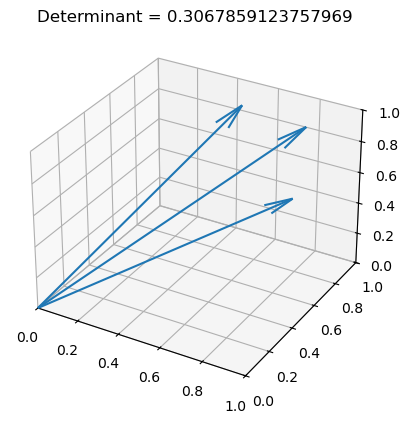

In [32]:
# create a positive definite matrix and compute its determinant
U = np.random.rand(3, 3)
u0 = np.atleast_2d(U[:,0]).T
u1 = np.atleast_2d(U[:,1]).T
u2 = np.atleast_2d(U[:,2]).T

X = u0@u0.T + u1@u1.T + u2@u2.T

detX = np.linalg.det(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(3):
    ax.quiver(0, 0, 0, X[0, i], X[1, i], X[2, i], arrow_length_ratio=0.1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_title(f"Determinant = {detX}")
plt.show()


## Eigenvectors and Eigenvalues
Given a matrix $A$, its eigenvectors $\mathbf{v}$ and associated eigenvalues $\lambda$ satisfy:
$$
A\mathbf{v} = \lambda \mathbf{v}
$$
The eigenvectors of $A$ are vectors which the transformation given by $A$ only scales but doesn’t change the direction of.


In [39]:
# create a positive definite matrix and compute its eigenvalues and eigenvectors
U = np.random.rand(3, 3)
u0 = np.atleast_2d(U[:,0]).T
u1 = np.atleast_2d(U[:,1]).T
u2 = np.atleast_2d(U[:,2]).T
X = u0@u0.T + u1@u1.T + u2@u2.T

# compute the eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(X)

print(f'Eigenvalues: {eigvals}')
print('')
print(f'First eigenvector {eigvecs[0]}')
print(f'Second eigenvector {eigvecs[1]}')
print(f'Third eigenvector {eigvecs[2]}')

Eigenvalues: [4.28427109 0.00794724 0.26798733]

First eigenvector [-0.62062278 -0.61657185  0.4844239 ]
Second eigenvector [-0.72189877  0.20813104 -0.6599573 ]
Third eigenvector [-0.30608744  0.75928955  0.57427333]



## Singular Value Decomposition (SVD)
Given matrix $A$, its singular value decomposition is given by:
$$
A = U S V^T
$$
Where $U$ and $V$ are orthonormal matrices, and $S$ is diagonal.



## Singular Value Decomposition (SVD) - Continued
$$
A = \sum_{i=1}^{r} \mathbf{u}_i s_i \mathbf{v}_i^T
$$
- $\mathbf{u}_i$ denotes the $i$-th column of matrix $U$
- $s_i$ is the element in row $i$ and column $i$ of diagonal matrix $S$
- $\mathbf{v}_i$ denotes the $i$-th column of matrix $V$

Note that this is a decomposition of a matrix into a sum of outer products.
## SVD demo

<class 'numpy.ndarray'> (1024, 687, 3)


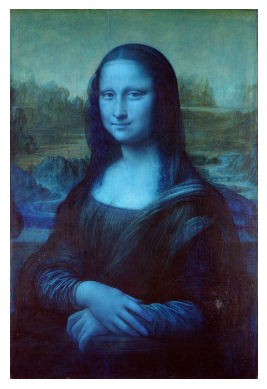

In [42]:
# read in the Mona Lisa into an array and then display it
image = cv2.imread("Mona_2.jpg")
print(type(image), image.shape)
plt.axis("off")
plt.imshow(image)
plt.show()

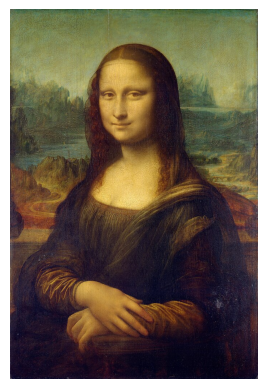

In [43]:
# repeat but this time with the correct RGB color ordering
image = cv2.imread("Mona_2.jpg")
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(new_image)

In [44]:
# extract the 3 color components into separate matrices
new_image_r = new_image[:,:,0] # red
new_image_g = new_image[:,:,1] # green
new_image_b = new_image[:,:,2] # blue

# inspect the shapes of each color component
print(new_image_r.shape, new_image_g.shape, new_image_b.shape)

(1024, 687) (1024, 687) (1024, 687)


In [45]:
# compute the svd of the red channel
U_r, S_r, V_r = np.linalg.svd(new_image_r)
U_g, S_g, V_g = np.linalg.svd(new_image_g)
U_b, S_b, V_b = np.linalg.svd(new_image_b)

# inspect the shapes of the matrices that are generated by the SVD
print(U_r.shape, S_r.shape, V_r.shape)

(1024, 1024) (687,) (687, 687)


Plot the first column of U and the first row of V. These are known as the left and right **singular vectors**

Text(0.5, 1.0, 'First row of V')

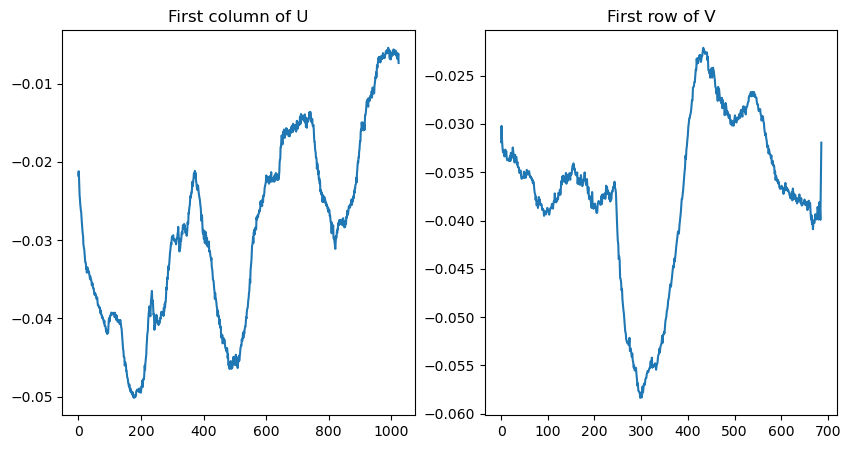

In [47]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(U_r[:,0])
ax[0].set_title('First column of U')
ax[1].plot(V_r[0,:])
ax[1].set_title('First row of V')

Let's reconstruct the original image using only the first $k$ singular values.

In [51]:
k = 10
reconstructed_image_r = U_r[:,:k] @ np.diag(S_r[:k]) @ V_r[:k,:] # make sure you understand the syntax here
reconstructed_image_g = U_g[:,:k] @ np.diag(S_g[:k]) @ V_g[:k,:]
reconstructed_image_b = U_b[:,:k] @ np.diag(S_b[:k]) @ V_b[:k,:]

In [52]:
# assemble the r, g, b channels back together
reconstructed_image = np.zeros_like(new_image)
reconstructed_image[:,:,0] = reconstructed_image_r
reconstructed_image[:,:,1] = reconstructed_image_g
reconstructed_image[:,:,2] = reconstructed_image_b

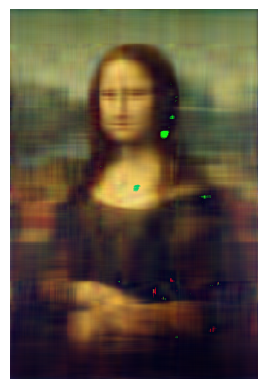

In [53]:
# display the reconstructed image
plt.axis("off")
plt.imshow(reconstructed_image)

Plot the singular value spectrum. This tells us ``how much'' of the data is contained in each singular value.

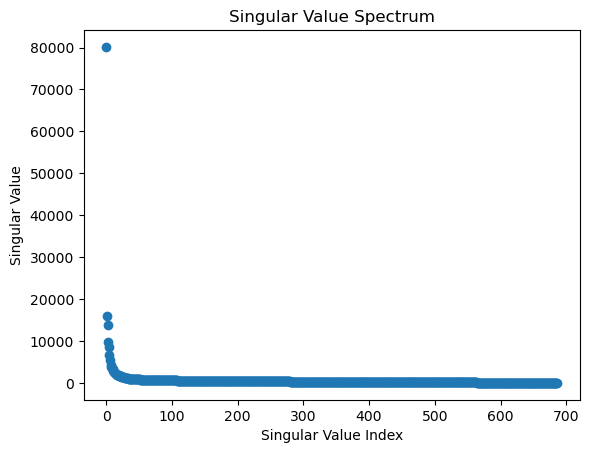

In [54]:
plt.plot(S_r, 'o')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.title('Singular Value Spectrum')
plt.show()